# Clustering

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Load preprocessed data
iris_preprocessed = pd.read_csv(r'C:\Users\Makena\OneDrive\Desktop\USIU\2nd Summer sem\DWM\End sem\DSA-2040_Practical_Exam_Mitchel_413\Data Mining\Data Pre and Explo\data\iris_preprocessed.csv')

# Separate features and true labels
feature_cols = [col for col in iris_preprocessed.columns if not col.startswith('class_')]
X = iris_preprocessed[feature_cols]
# Reconstruct true labels from one-hot columns
true_labels = iris_preprocessed[[col for col in iris_preprocessed.columns if col.startswith('class_')]].idxmax(axis=1).str.replace('class_', '').astype(int)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
pred_clusters = kmeans.labels_

# Compare clusters with actual classes using Adjusted Rand Index
ari = adjusted_rand_score(true_labels, pred_clusters)
print(f'Adjusted Rand Index (ARI) between predicted clusters and actual classes: {ari:.3f}')

Adjusted Rand Index (ARI) between predicted clusters and actual classes: 0.701


## Experiment : to justify optimal k

k=2, inertia=12.13
k=3, inertia=7.12
k=4, inertia=5.53


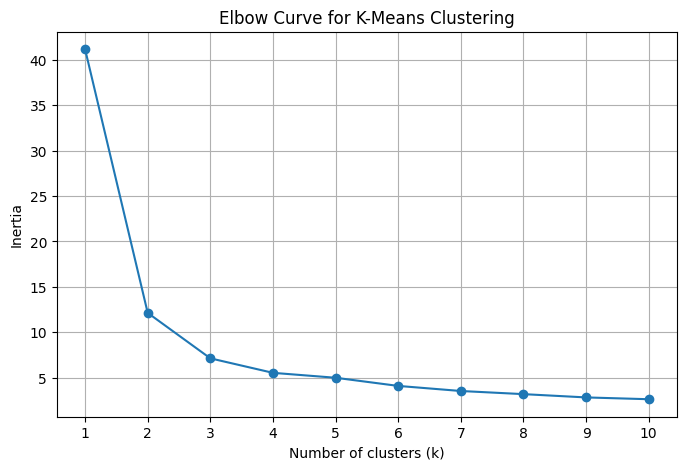

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try k=2, 3, 4 and plot inertia (elbow curve)
k_values = [2, 3, 4]
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    print(f'k={k}, inertia={kmeans.inertia_:.2f}')

# Elbow curve for k=1 to k=10
elbow_k = range(1, 11)
elbow_inertias = []
for k in elbow_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    elbow_inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(elbow_k, elbow_inertias, marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_k)
plt.grid(True)
plt.show()